<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_pet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


By Carli Beisel

Created August 2024

Purpose: Calculates open-water evapiration for irrigation systems in Mason using IDWR monthly open-water evaporation estimates.


In [1]:
#-------------------------------------------#
#     Import Packages & Connect to Drive    #
#-------------------------------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/pet/reach_pet.csv')
reach_pet = file['PET (af/month)']
reaches = file['Reach']
months = file['Month']

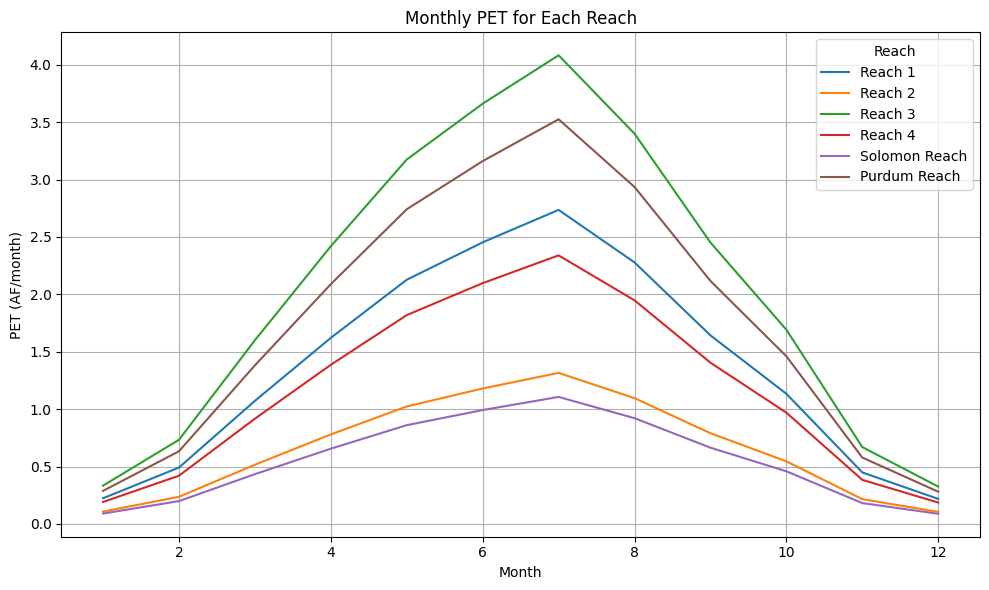

In [ ]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot PET for each reach
for reach in reaches.unique():
    reach_data = file[file['Reach'] == reach]
    plt.plot(reach_data['Month'], reach_data['PET (af/month)'], label=reach)

# Customize the plot
plt.title('Monthly PET for Each Reach')
plt.xlabel('Month')
plt.ylabel('PET (AF/month)')
plt.legend(title='Reach', loc='upper right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

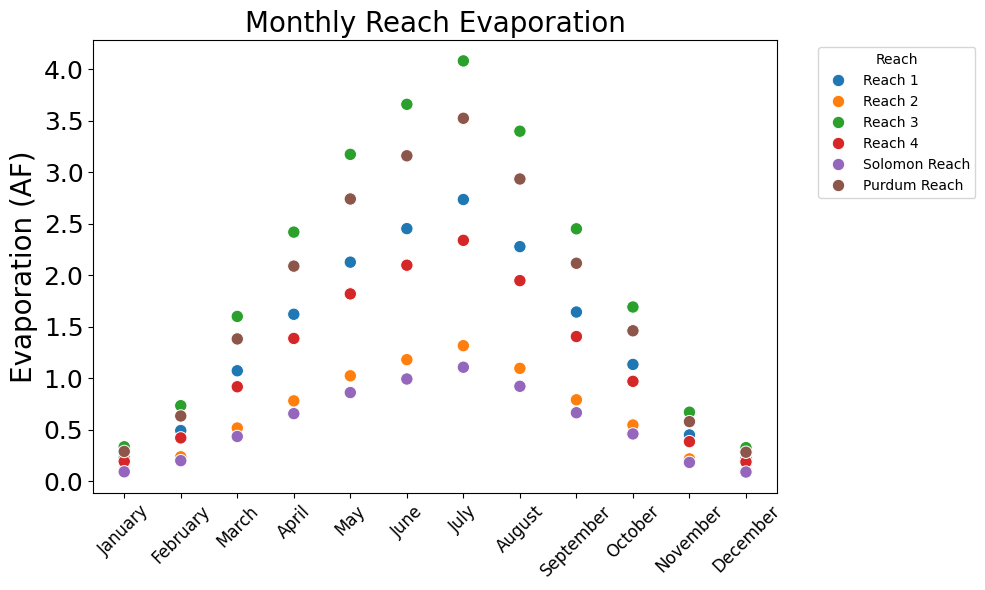

In [3]:
file = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/pet_out/reach_pet.csv')

reach_colors = {
    'Reach 1': '#1f77b4',  # Blue
    'Reach 2': '#ff7f0e',  # Orange
    'Reach 3': '#2ca02c',  # Green
    'Reach 4': '#d62728',  # Red
    'Solomon Reach': '#9467bd',  # Purple
    'Purdum Reach': '#8c564b'  # Brown
}

reach_markers = {
    'Reach 1': 'o',  # Circle
    'Reach 2': 'o',  # Square
    'Reach 3': 'o',  # Triangle
    'Reach 4': 'o',  # Diamond
    'Solomon Reach': 'o',  # Downward triangle
    'Purdum Reach': 'o'  # Plus
}

# Map the 'Month' column using the month_map dictionary
file['Month'] = file['Month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=file,
    x='Month',
    y='PET (af/month)',
    hue='Reach',
    style='Reach',
    palette=reach_colors,
    markers=reach_markers,
    s=80
)

# Customize the plot
plt.title('Monthly Reach Evaporation', fontsize=20)
plt.xlabel('', fontsize=14)
plt.ylabel('Evaporation (AF)', fontsize=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)

# Move the legend outside of the plot
plt.legend(title='Reach', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Budget/reach_pet.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-14-5e34e6f95d0f>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-14-5e34e6f95d0f>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-14-5e34e6f95d0f>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-14-5e34e6f95d0f>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-14-5e34e6f95d0f>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-14-5e34e6f95d0f>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


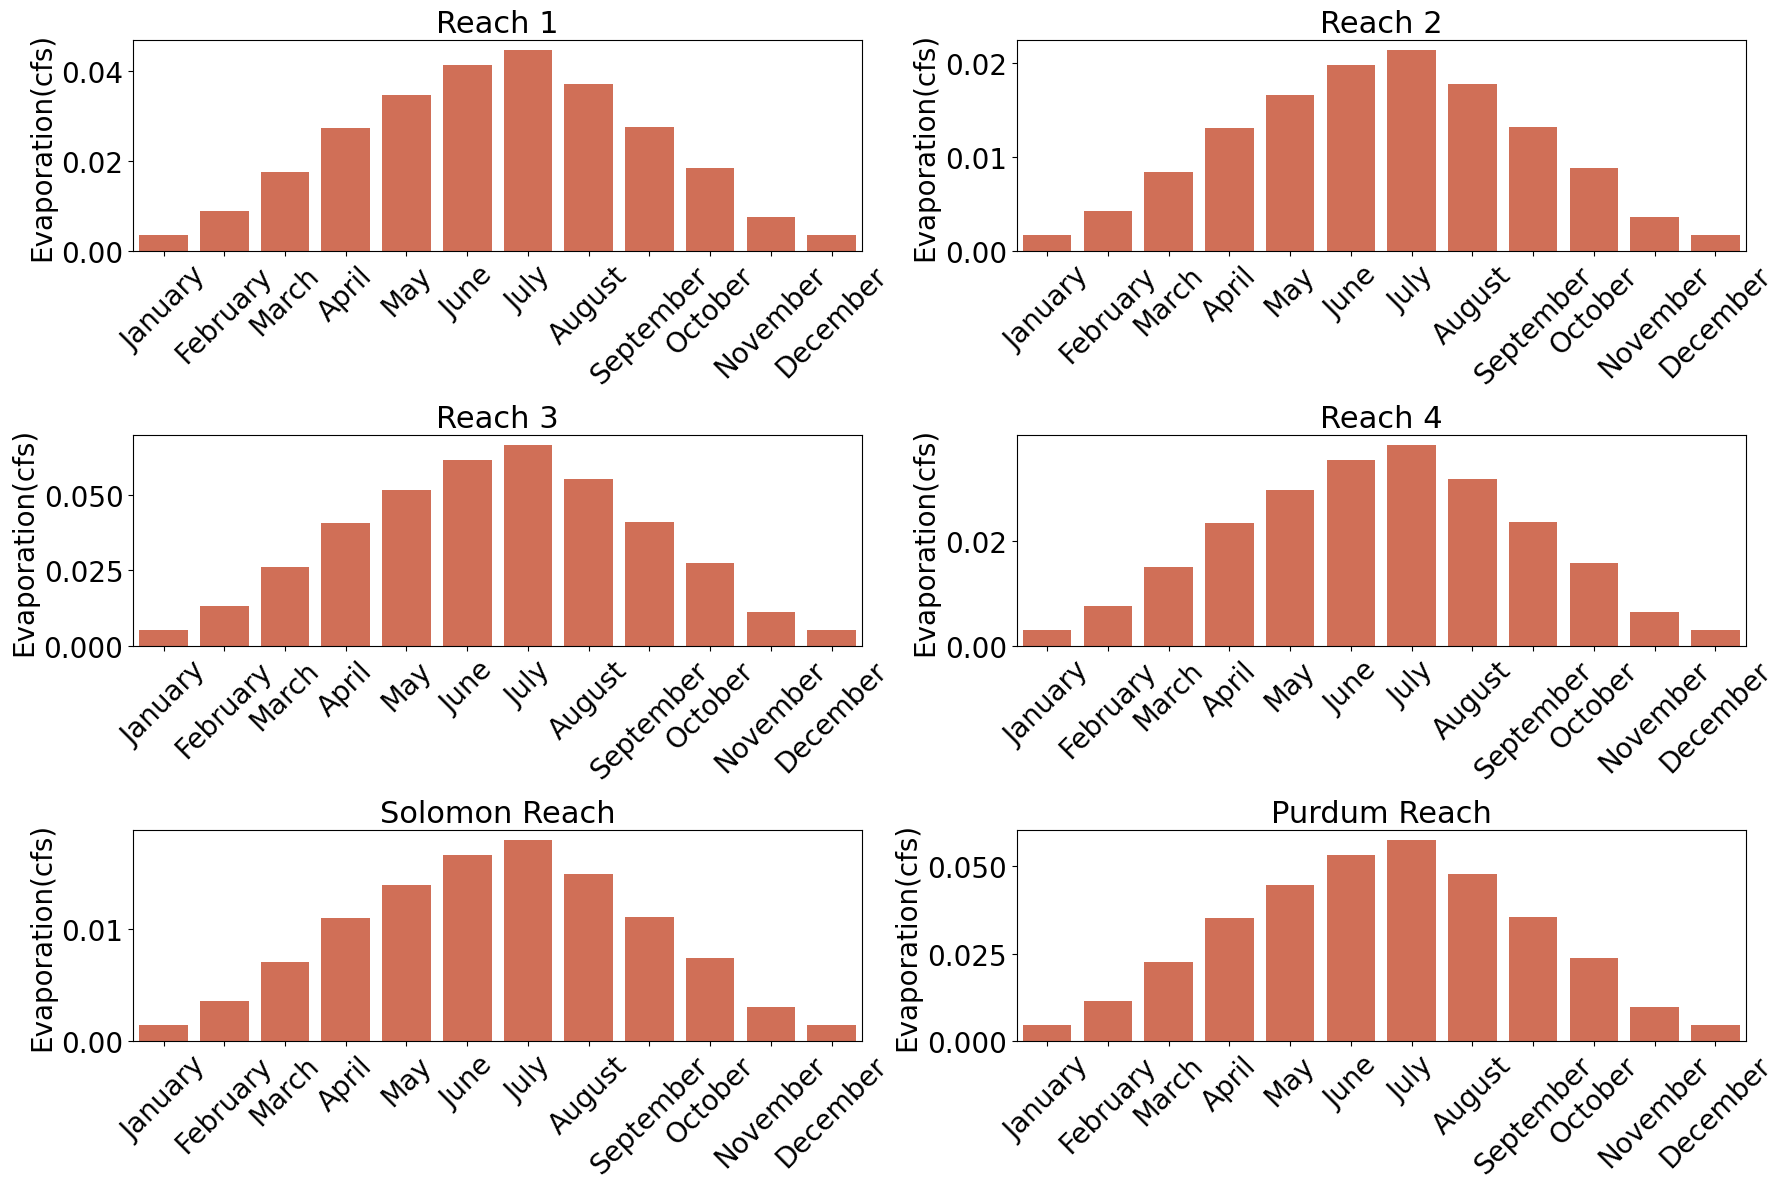

In [ ]:
# ------------------------------------------ #
# Plot of monthly evaporation for each Reach
# ------------------------------------------ #

file = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/pet_out/reach_pet.csv')

# Map numeric months to full names and calculate days in the month
month_map = {
    1: ('January', 31), 2: ('February', 28), 3: ('March', 31), 4: ('April', 30),
    5: ('May', 31), 6: ('June', 30), 7: ('July', 31), 8: ('August', 31),
    9: ('September', 30), 10: ('October', 31), 11: ('November', 30), 12: ('December', 31)
}
file[['Month Name', 'Days in Month']] = file['Month'].map(month_map).apply(pd.Series)

# Convert PET from af/month to cfs
file['PET (cfs)'] = (file['PET (af/month)'] * 43560) / (file['Days in Month'] * 86400)

month_order = [
    'January', 'February', 'March', 'April', 'May',
    'June', 'July', 'August', 'September', 'October',
    'November', 'December'
]

# Create a 3x2 panel (6 plots max)
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for i, reach in enumerate(file['Reach'].unique()):
    ax = axes[i]
    sns.barplot(
        data=file[file['Reach'] == reach],
        x='Month Name', y='PET (cfs)', color='#E46343', ci=None, ax=ax,
        order=month_order
    )
    ax.set_title(reach, fontsize=22)
    ax.set_xlabel('')
    ax.set_ylabel('Evaporation(cfs)', fontsize=20)
    ax.tick_params(axis='x', rotation=45, labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

for j in range(len(file['Reach'].unique()), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
output_path = '/content/drive/MyDrive/Data/Mason Water Budget/data_output/pet_out/reach_pet_panel_cfs.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()